In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the training and testing data with error handling
train_data = pd.read_csv('TrainingData.csv')
test_data = pd.read_csv('TestingData.csv')

# Separate features and labels with descriptive variable names
features_train = train_data.iloc[:, :-1]
labels_train = train_data.iloc[:, -1]
features_test = test_data.iloc[:, :-1]
labels_test = test_data.iloc[:, -1]


# Function to calculate type 1 and type 2 error rates
def calculate_error_rates(y_true, y_pred):
    type_1_error = np.sum((y_true == 0) & (y_pred == 1)) / len(y_true[y_true == 0])
    type_2_error = np.sum((y_true == 1) & (y_pred == 0)) / len(y_true[y_true == 1])
    return type_1_error, type_2_error

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

def run_lda():
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred_lda = lda.predict(X_test)
    type1_lda, type2_lda = calculate_error_rates(y_test, y_pred_lda)
    print(f"LDA Type 1 Error: {type1_lda}, Type 2 Error: {type2_lda}")
    return type1_lda, type2_lda

lda_results = run_lda()

LDA Type 1 Error: 0.16, Type 2 Error: 0.03


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
tree = DecisionTreeClassifier(criterion='gini', random_state=42)
tree.fit(X_train, y_train)

# Predict on the testing data
y_pred_tree = tree.predict(X_test)

# Calculate the error rates for Decision Tree
type1_tree, type2_tree = calculate_error_rates(y_test, y_pred_tree)
print(f"Decision Tree Type 1 Error: {type1_tree}, Type 2 Error: {type2_tree}")


Decision Tree Type 1 Error: 0.175, Type 2 Error: 0.155


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def run_knn():
    k_values = [1, 3, 5, 10]
    results = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        type1_knn, type2_knn = calculate_error_rates(y_test, y_pred_knn)
        results.append({'k': k, 'type_1_error': type1_knn, 'type_2_error': type2_knn})
        print(f"kNN (k={k}) Type 1 Error: {type1_knn}, Type 2 Error: {type2_knn}")

    return results

knn_results = run_knn()

kNN (k=1) Type 1 Error: 0.25, Type 2 Error: 0.185
kNN (k=3) Type 1 Error: 0.185, Type 2 Error: 0.17
kNN (k=5) Type 1 Error: 0.2, Type 2 Error: 0.135
kNN (k=10) Type 1 Error: 0.17, Type 2 Error: 0.165


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Scale the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM with scaled data
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_svm = svm.predict(X_test_scaled)

# Calculate the error rates for SVM
type1_svm, type2_svm = calculate_error_rates(y_test, y_pred_svm)
print(f"SVM Type 1 Error: {type1_svm}, Type 2 Error: {type2_svm}")

SVM Type 1 Error: 0.125, Type 2 Error: 0.02


In [ ]:
def run_pca_classifiers():
    n_components_list = [5, 10, 15]
    results = []

    for n_components in n_components_list:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)

        # kNN with PCA
        knn_pca = KNeighborsClassifier(n_neighbors=3)
        knn_pca.fit(X_train_pca, y_train)
        y_pred_knn_pca = knn_pca.predict(X_test_pca)
        type1_knn_pca, type2_knn_pca = calculate_error_rates(y_test, y_pred_knn_pca)
        results.append({'method': 'kNN', 'n_components': n_components, 'type_1_error': type1_knn_pca, 'type_2_error': type2_knn_pca})
        print(f"PCA (n={n_components}) kNN Type 1 Error: {type1_knn_pca}, Type 2 Error: {type2_knn_pca}")

        # SVM with PCA
        svm_pca = SVC(kernel='linear', C=1, random_state=42)
        svm_pca.fit(X_train_pca, y_train)
        y_pred_svm_pca = svm_pca.predict(X_test_pca)
        type1_svm_pca, type2_svm_pca = calculate_error_rates(y_test, y_pred_svm_pca)
        results.append({'method': 'SVM', 'n_components': n_components, 'type_1_error': type1_svm_pca, 'type_2_error': type2_svm_pca})
        print(f"PCA (n={n_components}) SVM Type 1 Error: {type1_svm_pca}, Type 2 Error: {type2_svm_pca}")

    return results

pca_results = run_pca_classifiers()

PCA (n=5) kNN Type 1 Error: 0.16, Type 2 Error: 0.105
PCA (n=5) SVM Type 1 Error: 0.14, Type 2 Error: 0.075
PCA (n=10) kNN Type 1 Error: 0.22, Type 2 Error: 0.155
PCA (n=10) SVM Type 1 Error: 0.155, Type 2 Error: 0.045
PCA (n=15) kNN Type 1 Error: 0.235, Type 2 Error: 0.15
PCA (n=15) SVM Type 1 Error: 0.15, Type 2 Error: 0.025


NameError: name 'svm_results' is not defined

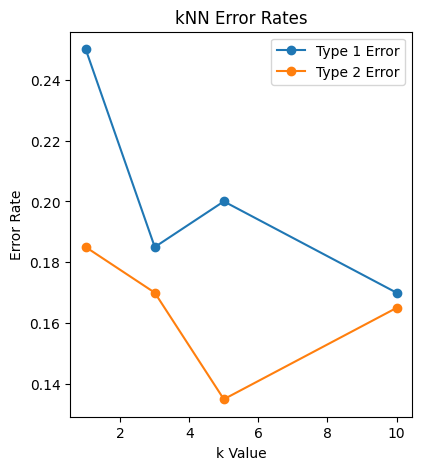

In [ ]:
def plot_results():
    # Plot kNN results
    k_values = [result['k'] for result in knn_results]
    type1_knn = [result['type_1_error'] for result in knn_results]
    type2_knn = [result['type_2_error'] for result in knn_results]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(k_values, type1_knn, marker='o', label='Type 1 Error')
    plt.plot(k_values, type2_knn, marker='o', label='Type 2 Error')
    plt.title('kNN Error Rates')
    plt.xlabel('k Value')
    plt.ylabel('Error Rate')
    plt.legend()

    # Plot SVM results
    C_values = [result['C'] for result in svm_results]
    type1_svm = [result['type_1_error'] for result in svm_results]
    type2_svm = [result['type_2_error'] for result in svm_results]

    plt.subplot(1, 3, 2)
    plt.plot(C_values, type1_svm, marker='o', label='Type 1 Error')
    plt.plot(C_values, type2_svm, marker='o', label='Type 2 Error')
    plt.title('SVM Error Rates')
    plt.xlabel('C Value')
    plt.ylabel('Error Rate')
    plt.legend()

    # Plot Decision Tree results
    min_samples_leaf = [result['min_samples_leaf'] for result in dt_results]
    type1_dt = [result['type_1_error'] for result in dt_results]
    type2_dt = [result['type_2_error'] for result in dt_results]

    plt.subplot(1, 3, 3)
    plt.plot(min_samples_leaf, type1_dt, marker='o', label='Type 1 Error')
    plt.plot(min_samples_leaf, type2_dt, marker='o', label='Type 2 Error')
    plt.title('Decision Tree Error Rates')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Error Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results()